In [1]:
!pip install emoji

In [2]:
!pip install vaderSentiment

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
import re
import string
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import itertools

In [4]:
tweets = pd.read_csv("cyberbullying_tweets.csv")

In [5]:
tweets.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [6]:
tweets['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.remove("not")
stop_words.add("rt") #for twitter retweet
stop_words.remove("against")
# stop_words

In [9]:
print(stop_words)

{'once', 'each', 'about', 'it', "weren't", 'ma', 've', 'ourselves', 'an', 'by', 'your', 'these', 'why', 'rt', 'he', 'aren', 'when', 'where', 'than', 't', 'or', 'will', 'up', 'theirs', 'just', 'doing', 'what', 'until', 'ain', 'with', "you're", 'again', 'weren', 're', 'the', 'after', 'this', 'from', 'did', 'such', 'shouldn', 'you', 'have', 'in', 'doesn', 'into', 'both', "wouldn't", 'does', 'most', 'those', "wasn't", 'mightn', 'couldn', 'won', 'over', 'has', 'nor', 'no', 'if', 'being', 'of', "shouldn't", 'to', 'is', 'and', 'because', 'above', 'hasn', "won't", "haven't", 'that', 'yourselves', 'under', 'further', 'didn', "hasn't", 'his', 'some', 'as', 'were', "didn't", 'be', "couldn't", 'their', 'before', "you'll", "that'll", 'on', 'isn', 'mustn', 'been', 'needn', "you've", 'between', 'few', 'any', 'my', 'its', 'here', 'o', 'for', 'she', 'at', 'him', 'should', "mustn't", 'so', "hadn't", "don't", "it's", 'they', 'herself', 'had', 'hadn', 'down', 'me', 'am', "she's", 'do', 'm', 'we', 'll', 'y

In [10]:
#this is to remove the retweet links
twitter_string = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [11]:
tweets["tweet_text"] = tweets["tweet_text"].str.lower()

In [12]:
#remove tags to people and 
# retweet links of the people 
# and also remove stopwords
# and convert emoji to words

tweets["processed_tweet"] = tweets["tweet_text"] \
.apply(lambda x : [value for value in x.split(" ") if value.strip() not in stop_words]) \
.apply(lambda x : [value for value in x if not value.startswith('@')]) \
.apply(lambda x : ' '.join(x).strip()) \
.apply(lambda x : re.sub(twitter_string,' ', x)) \
.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)).strip()) \
.apply(lambda x : emoji.demojize(x)) 

tweets

tweet_text cyberbullying_type  \
0      in other words #katandandre, your food was cra...  not_cyberbullying   
1      why is #aussietv so white? #mkr #theblock #ima...  not_cyberbullying   
2      @xochitlsuckkks a classy whore? or more red ve...  not_cyberbullying   
3      @jason_gio meh. :p  thanks for the heads up, b...  not_cyberbullying   
4      @rudhoeenglish this is an isis account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl aren't expected to do anything, depe...          ethnicity   
47688  turner did not withhold his disappointment. tu...          ethnicity   
47689  i swear to god. this dumb nigger bitch. i have...          ethnicity   
47690  yea fuck you rt @therealexel: if youre a nigge...          ethnicity   
47691  bro. u gotta chill rt @chillshrammy: dog fuck ...          ethnicity   

                                         processed_tweet  
0                words katandandre food crapilicious mkr  
1      aussietv white mkr theblock imacelebrityau tod...  
2                       classy whore red velvet cupcakes  
3      meh p thanks heads up not concerned another an...  
4      isis account pretending kurdish account like i...  
...                                                  ...  
47687  black ppl expected anything depended anything ...  
47688  turner not withhold disappointment turner call...  
47689  swear god dumb nigger bitch got bleach hair re...  
47690  yea fuck youre nigger fucking unfollow me fuck...  
47691  bro u gotta chill dog fuck kp dumb nigger bitc...  

[47692 rows x 3 columns]

In [13]:
#doing lemmatization
lemmatizer = WordNetLemmatizer()
# word_tokenize("heojf doof")

In [14]:
tweets["processed_tweet_lemm"] = tweets["processed_tweet"]\
                            .apply(lambda x : ' '.join([lemmatizer.lemmatize(value) for value in word_tokenize(x)]))

In [44]:
tweets

tweet_text cyberbullying_type  \
0      in other words #katandandre, your food was cra...  not_cyberbullying   
1      why is #aussietv so white? #mkr #theblock #ima...  not_cyberbullying   
2      @xochitlsuckkks a classy whore? or more red ve...  not_cyberbullying   
3      @jason_gio meh. :p  thanks for the heads up, b...  not_cyberbullying   
4      @rudhoeenglish this is an isis account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl aren't expected to do anything, depe...          ethnicity   
47688  turner did not withhold his disappointment. tu...          ethnicity   
47689  i swear to god. this dumb nigger bitch. i have...          ethnicity   
47690  yea fuck you rt @therealexel: if youre a nigge...          ethnicity   
47691  bro. u gotta chill rt @chillshrammy: dog fuck ...          ethnicity   

                                         processed_tweet  \
0                words katandandre food crapilicious mkr   
1      aussietv white mkr theblock imacelebrityau tod...   
2                       classy whore red velvet cupcakes   
3      meh p thanks heads up not concerned another an...   
4      isis account pretending kurdish account like i...   
...                                                  ...   
47687  black ppl expected anything depended anything ...   
47688  turner not withhold disappointment turner call...   
47689  swear god dumb nigger bitch got bleach hair re...   
47690  yea fuck youre nigger fucking unfollow me fuck...   
47691  bro u gotta chill dog fuck kp dumb nigger bitc...   

                                    processed_tweet_lemm  \
0                 word katandandre food crapilicious mkr   
1      aussietv white mkr theblock imacelebrityau tod...   
2                        classy whore red velvet cupcake   
3      meh p thanks head up not concerned another ang...   
4      isi account pretending kurdish account like is...   
...                                                  ...   
47687  black ppl expected anything depended anything ...   
47688  turner not withhold disappointment turner call...   
47689  swear god dumb nigger bitch got bleach hair re...   
47690  yea fuck youre nigger fucking unfollow me fuck...   
47691  bro u got ta chill dog fuck kp dumb nigger bit...   

                                                 bigrams  
0      [(word, katandandre), (katandandre, food), (fo...  
1      [(aussietv, white), (white, mkr), (mkr, theblo...  
2      [(classy, whore), (whore, red), (red, velvet),...  
3      [(meh, p), (p, thanks), (thanks, head), (head,...  
4      [(isi, account), (account, pretending), (prete...  
...                                                  ...  
47687  [(black, ppl), (ppl, expected), (expected, any...  
47688  [(turner, not), (not, withhold), (withhold, di...  
47689  [(swear, god), (god, dumb), (dumb, nigger), (n...  
47690  [(yea, fuck), (fuck, youre), (youre, nigger), ...  
47691  [(bro, u), (u, got), (got, ta), (ta, chill), (...  

[47692 rows x 5 columns]

# Exploratory Data Analysis

In [17]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [18]:
tweets.groupby("cyberbullying_type").size()

cyberbullying_type
age                    7992
ethnicity              7961
gender                 7973
not_cyberbullying      7945
other_cyberbullying    7823
religion               7998
dtype: int64

In [19]:
#To display count of each type of cyberbullying record that we have and individual counts

import plotly.express as px
fig = px.bar(tweets.cyberbullying_type.value_counts(),text=tweets.cyberbullying_type.value_counts(), color_discrete_sequence=px.colors.qualitative.D3, custom_data=[tweets.cyberbullying_type.value_counts()])
fig.update_traces(hovertemplate='<br><b>Total: </b>%{customdata[0]}')
fig.update_layout(title='Cyberbullying types',
                 template='seaborn',
                 hovermode='x unified',
                 xaxis=dict(title='Cyberbullying Type'),
                 yaxis=dict(title='Tweet Count'),
                 showlegend=True)


fig.show()

In [ ]:
# The below are just repeated words but Lets say we need to find the most occuring bigram

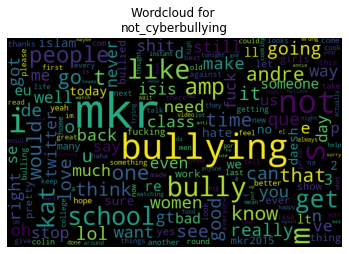

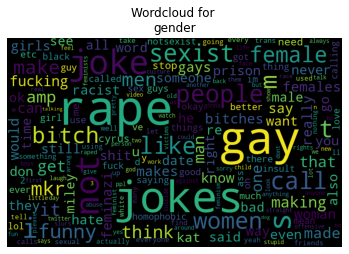

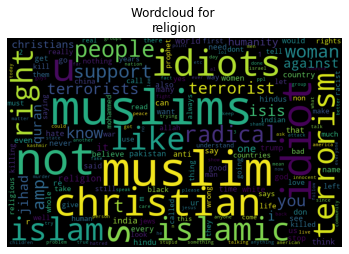

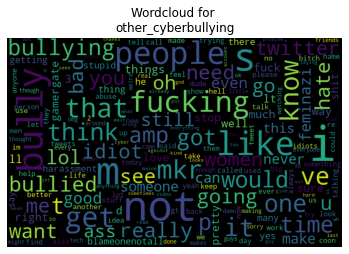

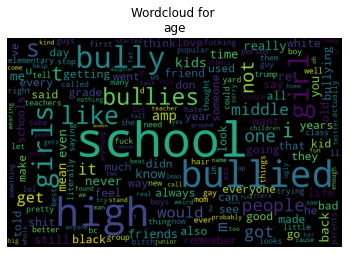

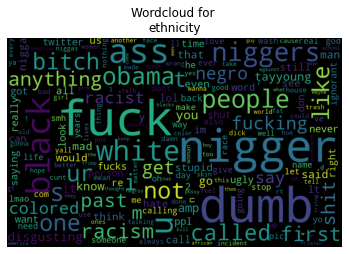

In [77]:
for cyber_type in tweets.cyberbullying_type.unique():
    
    allwords = [twts.split(" ") for twts in tweets.processed_tweet[tweets.cyberbullying_type==cyber_type]]
    allwords = list(itertools.chain.from_iterable(allwords))
    allwords = Counter(allwords)
    wordCloud = WordCloud(width=800,height=500,random_state=30,max_font_size=115) \
                            .generate_from_frequencies(allwords)
    
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.title("Wordcloud for \n"+ cyber_type)
    plt.show()


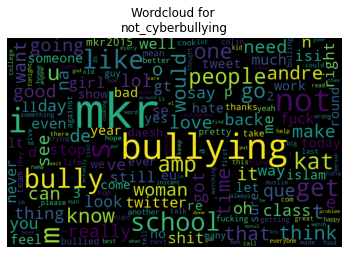

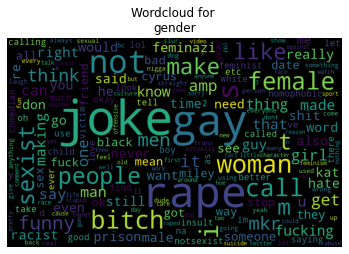

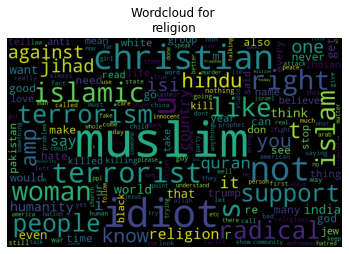

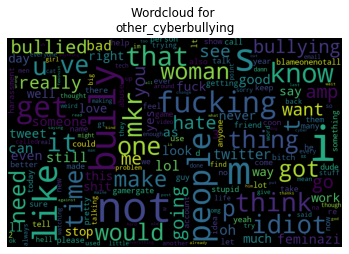

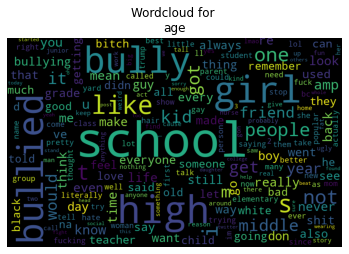

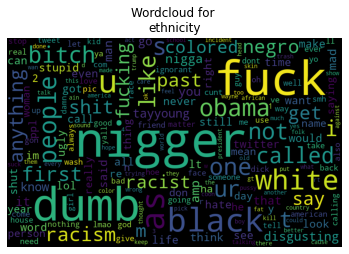

In [81]:
#this is done on lemmatized words -> just to know how many distinct words can we get
# We see only very little difference, but the counts specify alot

for cyber_type in tweets.cyberbullying_type.unique():
    
    allwords = [twts.split(" ") for twts in tweets.processed_tweet_lemm[tweets.cyberbullying_type==cyber_type]]
    allwords = list(itertools.chain.from_iterable(allwords))
    allwords = Counter(allwords)
    wordCloud = WordCloud(width=800,height=500,random_state=30,max_font_size=115) \
                            .generate_from_frequencies(allwords)
    
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.title("Wordcloud for \n"+ cyber_type)
    plt.show()


In [50]:
#create bigrams 
tweets["bigrams"] = tweets["processed_tweet_lemm"].apply(lambda x: list(nltk.bigrams(x.split(" "))))

related_words = []
i=0

for cyber_type in tweets.cyberbullying_type.unique():

    #only taking related words
    related_words.append([ postag[0].strip() for word in tweets.processed_tweet[tweets.cyberbullying_type==cyber_type] \
                    for postag in nltk.pos_tag(word_tokenize(word)) \
                    if postag[1] in ('JJ', 'VBP', 'VBD')])
    
    related_words[i] = set(related_words[i])
    related_words[i] = list(related_words[i]) 
    i = i+1

In [51]:
print(related_words[3])

['match', 'robot', 'overall', 'canned', 'hank', 'developerweek', 'declined', 'curious', 'prefer', 'ugliest', 'milo', 'metric', 'lolx', 'added', 'break', 'neat', 'ramsay', 'replaced', 'british', 'leaked', 'insisted', 'kid', 'lucky', 'obscene', 'garlic', 'human', 'handle', 'favorite', 'vocabulary', 'valuable', 'immense', 'behavioral', 'wv', 'context', 'accomplishment', 'xoxoxo', 'became', 'legit', 'caution', 'beef', 'muslim', 'presented', 'repeal', 'local', 'elementary', 'ac', 'faggot', 'disgraceful', 'ethical', 'geekboy20x6', 'cutekitten', 'accountable', 'naga', 'confirm', 'booked', 'arrogant', 'hate', 'obnoxious', 'substantial', 'made', 'cost', 'national', 'frankly', 'sane', 'relevant', 'nigel', 'userbase', 'irritated', 'shd', 'freudian', 'esteemed', 'grown', 'um', 'spendy', 'spamming', 'horn', 'glorious', 'ggautoblocker', 'ahaha', 'superfish', 'choke', 'openbsd', 'unfit', 'vine', 'assumed', 'tru', 'ensured', 'loop', 'summon', 'wod', 'meettttt', 'responsible', 'fourth', 'spikey', 'leo'

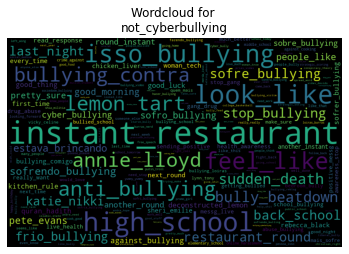

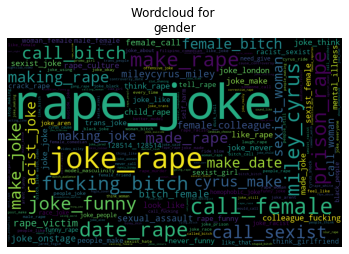

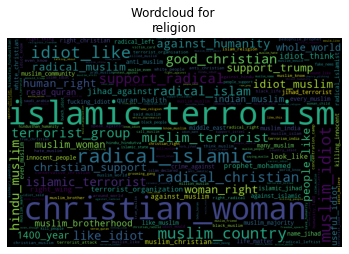

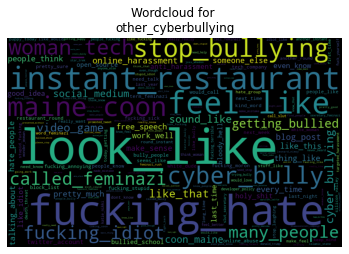

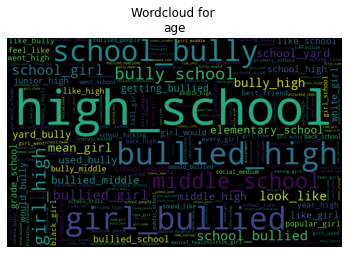

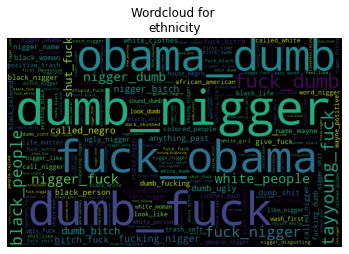

In [82]:
# vectorizer = CountVectorizer(ngram_range=(2, 2))

#do parts of speech tagging and find all adjectives, adverbs and nouns
#build wordcloud only of those words
i = 0

for cyber_type in tweets.cyberbullying_type.unique():
    
    allwords = [bigram for bigram in tweets.bigrams[tweets.cyberbullying_type==cyber_type]]
    allwords = list(itertools.chain.from_iterable(allwords))
    allwords = [bigram for bigram in allwords if (len(bigram[1]) > 3 and len(bigram[0]) > 3)]
#      and bigram[0] in related_words[i]
    allwords = [word[0]+ "_" + word[1] for word in allwords]

    allwords_counter = Counter(allwords)
    allwords = ' '.join(allwords)
    wordCloud = WordCloud(width=800,height=500,random_state=30,max_font_size=115).generate_from_frequencies(allwords_counter)
    
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.title("Wordcloud for \n"+ cyber_type)
    plt.show()
    i = i+1
    
#     print(allwords_counter)
#     break
    
    
# tweets

In [84]:
tweets

tweet_text cyberbullying_type  \
0      in other words #katandandre, your food was cra...  not_cyberbullying   
1      why is #aussietv so white? #mkr #theblock #ima...  not_cyberbullying   
2      @xochitlsuckkks a classy whore? or more red ve...  not_cyberbullying   
3      @jason_gio meh. :p  thanks for the heads up, b...  not_cyberbullying   
4      @rudhoeenglish this is an isis account pretend...  not_cyberbullying   
...                                                  ...                ...   
47687  black ppl aren't expected to do anything, depe...          ethnicity   
47688  turner did not withhold his disappointment. tu...          ethnicity   
47689  i swear to god. this dumb nigger bitch. i have...          ethnicity   
47690  yea fuck you rt @therealexel: if youre a nigge...          ethnicity   
47691  bro. u gotta chill rt @chillshrammy: dog fuck ...          ethnicity   

                                         processed_tweet  \
0                words katandandre food crapilicious mkr   
1      aussietv white mkr theblock imacelebrityau tod...   
2                       classy whore red velvet cupcakes   
3      meh p thanks heads up not concerned another an...   
4      isis account pretending kurdish account like i...   
...                                                  ...   
47687  black ppl expected anything depended anything ...   
47688  turner not withhold disappointment turner call...   
47689  swear god dumb nigger bitch got bleach hair re...   
47690  yea fuck youre nigger fucking unfollow me fuck...   
47691  bro u gotta chill dog fuck kp dumb nigger bitc...   

                                    processed_tweet_lemm  \
0                 word katandandre food crapilicious mkr   
1      aussietv white mkr theblock imacelebrityau tod...   
2                        classy whore red velvet cupcake   
3      meh p thanks head up not concerned another ang...   
4      isi account pretending kurdish account like is...   
...                                                  ...   
47687  black ppl expected anything depended anything ...   
47688  turner not withhold disappointment turner call...   
47689  swear god dumb nigger bitch got bleach hair re...   
47690  yea fuck youre nigger fucking unfollow me fuck...   
47691  bro u got ta chill dog fuck kp dumb nigger bit...   

                                                 bigrams  
0      [(word, katandandre), (katandandre, food), (fo...  
1      [(aussietv, white), (white, mkr), (mkr, theblo...  
2      [(classy, whore), (whore, red), (red, velvet),...  
3      [(meh, p), (p, thanks), (thanks, head), (head,...  
4      [(isi, account), (account, pretending), (prete...  
...                                                  ...  
47687  [(black, ppl), (ppl, expected), (expected, any...  
47688  [(turner, not), (not, withhold), (withhold, di...  
47689  [(swear, god), (god, dumb), (dumb, nigger), (n...  
47690  [(yea, fuck), (fuck, youre), (youre, nigger), ...  
47691  [(bro, u), (u, got), (got, ta), (ta, chill), (...  

[47692 rows x 5 columns]

# Sentiment Analysis

In [86]:
sid_obj = SentimentIntensityAnalyzer()

In [87]:
tweets['sentiments'] = tweets['processed_tweet'].apply(lambda x: sid_obj.polarity_scores(str(x)))

In [88]:
tweet_sentiment = tweets['sentiments'].apply(pd.Series)

In [89]:
tweets = tweets.merge(tweet_sentiment, left_index=True, right_index=True)

In [90]:
tweets.head()

tweet_text cyberbullying_type  \
0  in other words #katandandre, your food was cra...  not_cyberbullying   
1  why is #aussietv so white? #mkr #theblock #ima...  not_cyberbullying   
2  @xochitlsuckkks a classy whore? or more red ve...  not_cyberbullying   
3  @jason_gio meh. :p  thanks for the heads up, b...  not_cyberbullying   
4  @rudhoeenglish this is an isis account pretend...  not_cyberbullying   

                                     processed_tweet  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads up not concerned another an...   
4  isis account pretending kurdish account like i...   

                                processed_tweet_lemm  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head up not concerned another ang...   
4  isi account pretending kurdish account like is...   

                                             bigrams  \
0  [(word, katandandre), (katandandre, food), (fo...   
1  [(aussietv, white), (white, mkr), (mkr, theblo...   
2  [(classy, whore), (whore, red), (red, velvet),...   
3  [(meh, p), (p, thanks), (thanks, head), (head,...   
4  [(isi, account), (account, pretending), (prete...   

                                          sentiments    neg    neu    pos  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   
2  {'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...  0.422  0.294  0.284   
3  {'neg': 0.087, 'neu': 0.537, 'pos': 0.376, 'co...  0.087  0.537  0.376   
4  {'neg': 0.239, 'neu': 0.427, 'pos': 0.333, 'co...  0.239  0.427  0.333   

   compound  
0    0.0000  
1    0.0000  
2   -0.3400  
3    0.6488  
4    0.0258

In [91]:
tweets.rename(columns = {"neu":"Neutral", "neg":"Negative", "pos":"Positive", "compound":"Total_Sentiment_Score"}, inplace=True)

In [94]:
tweets.head()

tweet_text cyberbullying_type  \
0  in other words #katandandre, your food was cra...  not_cyberbullying   
1  why is #aussietv so white? #mkr #theblock #ima...  not_cyberbullying   
2  @xochitlsuckkks a classy whore? or more red ve...  not_cyberbullying   
3  @jason_gio meh. :p  thanks for the heads up, b...  not_cyberbullying   
4  @rudhoeenglish this is an isis account pretend...  not_cyberbullying   

                                     processed_tweet  \
0            words katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads up not concerned another an...   
4  isis account pretending kurdish account like i...   

                                processed_tweet_lemm  \
0             word katandandre food crapilicious mkr   
1  aussietv white mkr theblock imacelebrityau tod...   
2                    classy whore red velvet cupcake   
3  meh p thanks head up not concerned another ang...   
4  isi account pretending kurdish account like is...   

                                             bigrams  \
0  [(word, katandandre), (katandandre, food), (fo...   
1  [(aussietv, white), (white, mkr), (mkr, theblo...   
2  [(classy, whore), (whore, red), (red, velvet),...   
3  [(meh, p), (p, thanks), (thanks, head), (head,...   
4  [(isi, account), (account, pretending), (prete...   

                                          sentiments  Negative  Neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
2  {'neg': 0.422, 'neu': 0.294, 'pos': 0.284, 'co...     0.422    0.294   
3  {'neg': 0.087, 'neu': 0.537, 'pos': 0.376, 'co...     0.087    0.537   
4  {'neg': 0.239, 'neu': 0.427, 'pos': 0.333, 'co...     0.239    0.427   

   Positive  Total_Sentiment_Score  
0     0.000                 0.0000  
1     0.000                 0.0000  
2     0.284                -0.3400  
3     0.376                 0.6488  
4     0.333                 0.0258

In [95]:
tweets.to_csv("Intermediate_file.csv")

# TFIDF Matrix

In [54]:
#Importing TFIDFVectorizer
#min_df value determines lower base limit of tfidf value
#Max_features can be regulated to limit maximum columns of tfidf
from sklearn.feature_extraction.text import TfidfVectorizer  
v = TfidfVectorizer(max_features=1000,min_df=0.005,max_df=1.0,analyzer='word')

In [55]:
#Storing tfidf values using processed tweets column as train set
x = v.fit_transform(tweets['processed_tweet'])
tokens=v.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [56]:
#Creating TFIDF table dataframe using sentences vs processed tweets 

df_tfidfvect = pd.DataFrame(data = x.toarray(),index =tweets['tweet_text'],columns=tokens)

In [57]:
print(df_tfidfvect)
df_tfidfvect.to_csv("TFIDF_Matrix.csv")

                                                     10  abuse  ...       yet   yo
tweet_text                                                      ...               
In other words #katandandre, your food was crap...  0.0    0.0  ...  0.000000  0.0
Why is #aussietv so white? #MKR #theblock #ImAC...  0.0    0.0  ...  0.000000  0.0
@XochitlSuckkks a classy whore? Or more red vel...  0.0    0.0  ...  0.000000  0.0
@Jason_Gio meh. :P  thanks for the heads up, bu...  0.0    0.0  ...  0.000000  0.0
@RudhoeEnglish This is an ISIS account pretendi...  0.0    0.0  ...  0.000000  0.0
...                                                 ...    ...  ...       ...  ...
Black ppl aren't expected to do anything, depen...  0.0    0.0  ...  0.362055  0.0
Turner did not withhold his disappointment. Tur...  0.0    0.0  ...  0.000000  0.0
I swear to God. This dumb nigger bitch. I have ...  0.0    0.0  ...  0.000000  0.0
Yea fuck you RT @therealexel: IF YOURE A NIGGER...  0.0    0.0  ...  0.000000  0.0
Bro.

In [69]:
df_tfidfvect.head()

10  abuse  ...  yet   yo
tweet_text                                                      ...          
In other words #katandandre, your food was crap...  0.0    0.0  ...  0.0  0.0
Why is #aussietv so white? #MKR #theblock #ImAC...  0.0    0.0  ...  0.0  0.0
@XochitlSuckkks a classy whore? Or more red vel...  0.0    0.0  ...  0.0  0.0
@Jason_Gio meh. :P  thanks for the heads up, bu...  0.0    0.0  ...  0.0  0.0
@RudhoeEnglish This is an ISIS account pretendi...  0.0    0.0  ...  0.0  0.0

[5 rows x 360 columns]

# Feature Engineering

In [70]:
df_tfidfvect.reset_index()
df_feature= pd.merge(tweets,df_tfidfvect, how="left", on=["tweet_text", "tweet_text"])
df_feature.head()


tweet_text  ...   yo
0  In other words #katandandre, your food was cra...  ...  0.0
1  Why is #aussietv so white? #MKR #theblock #ImA...  ...  0.0
2  @XochitlSuckkks a classy whore? Or more red ve...  ...  0.0
3  @Jason_Gio meh. :P  thanks for the heads up, b...  ...  0.0
4  @Jason_Gio meh. :P  thanks for the heads up, b...  ...  0.0

[5 rows x 368 columns]

In [81]:
label= {'not_cyberbullying': 0,
             'gender': 1,
             'religion': 2,
             'other_cyberbullying': 3,
             'age': 4,
             'ethnicity': 5}
df_feature['cyberbullying_type'] = df_feature.cyberbullying_type.replace(label)
df_feature.head()

tweet_text  ...   yo
0  In other words #katandandre, your food was cra...  ...  0.0
1  Why is #aussietv so white? #MKR #theblock #ImA...  ...  0.0
2  @XochitlSuckkks a classy whore? Or more red ve...  ...  0.0
3  @Jason_Gio meh. :P  thanks for the heads up, b...  ...  0.0
4  @Jason_Gio meh. :P  thanks for the heads up, b...  ...  0.0

[5 rows x 368 columns]

# Model Development

In [129]:
X=df_feature.iloc[:,4:368]
y=df_feature.iloc[:,1:2]

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=555)

### Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=0,criterion='gini')
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(random_state=0)

In [134]:
y_pred = rf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.773852


### Decision Tree Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,splitter='best', criterion='gini')
clf = clf.fit(X_train,y_train)

In [136]:
y_pred = clf.predict(X_test)
print('Accuracy : %f' %(accuracy_score(y_pred, y_test)))

Accuracy : 0.747992
